<a href="https://colab.research.google.com/github/yoramabbou770/AICourseRoad2/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
750/750 [==============================] - 6s 7ms/step - loss: 0.5405 - accuracy: 0.8122 - val_loss: 0.4636 - val_accuracy: 0.8391
Epoch 2/5
750/750 [==============================] - 4s 5ms/step - loss: 0.3898 - accuracy: 0.8597 - val_loss: 0.4121 - val_accuracy: 0.8515
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.3471 - accuracy: 0.8742 - val_loss: 0.3539 - val_accuracy: 0.8713
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.3188 - accuracy: 0.8832 - val_loss: 0.3331 - val_accuracy: 0.8792
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3737 - accuracy: 0.8677
Test accuracy: 0.8676999807357788
313/313 [==============================] - 1s 2ms/step
True Label: Ankle boot, Predicted Label: Ankle boot
True Label: Pullover, Predicted Label: Pullover
True Label: Trouser, Predicted Label: Trouser
True Label: Trouser, Predicted Label: Trouser
True Label: Shirt, Predicted Label: Shirt
True Label: Tr

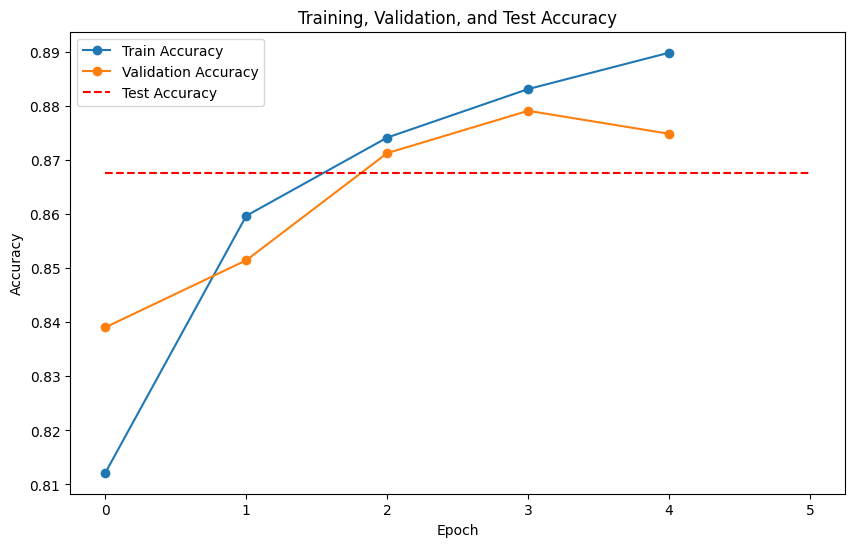

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Make predictions
predictions = model.predict(test_images)

# Get the predicted labels (argmax)
predicted_labels = tf.argmax(predictions, axis=1)

# Display some predictions
for i in range(10):
    true_label = class_names[tf.argmax(test_labels[i])]
    predicted_label = class_names[predicted_labels[i]]
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")\

# Plot training history and evaluation accuracy
plt.figure(figsize=(10, 6))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], 'o-', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], 'o-', label='Validation Accuracy')

# Plot evaluation accuracy (represented by a horizontal line since it's a single value)
plt.hlines(y=test_acc, xmin=0, xmax=len(history.history['accuracy']), colors='r', linestyles='dashed', label='Test Accuracy')

plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()